## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
##Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

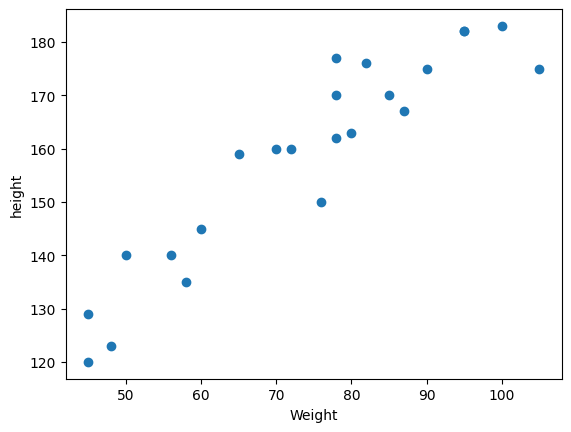

In [4]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('height')

In [22]:
## divide our dataset into independent and dependent edatures
x = df[['Weight']]  # independent feature
y = df['Height']  # dependent feature

In [23]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [24]:
# tarin test split
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [26]:
x.shape

(23, 1)

In [27]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [28]:
## Standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [31]:
x_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [33]:
scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

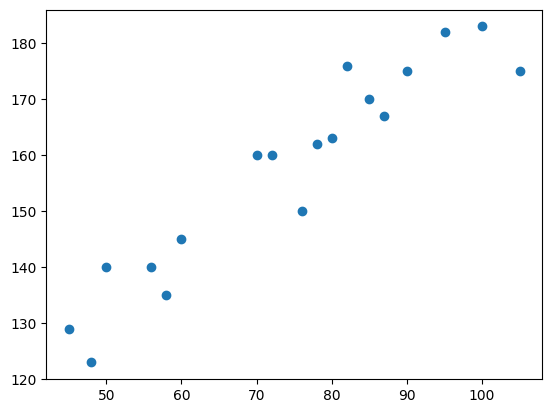

In [35]:
plt.scatter(x_train, y_train)

In [36]:
## Train the simple linear model 
from sklearn.linear_model import LinearRegression

In [37]:
regressor = LinearRegression()

In [38]:
regressor.fit(x_train, y_train)

LinearRegression()

In [40]:
print("The slope or coefficent of weight is", regressor.coef_)
print("Intercept:", regressor.intercept_)

The slope or coefficent of weight is [0.9630459]
Intercept: 85.96709053063559


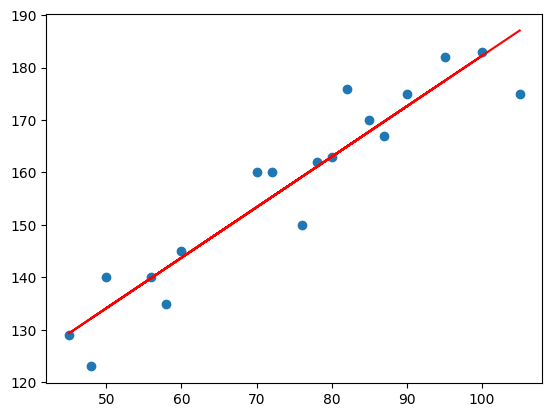

In [43]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), 'r')

#### prediction of train  data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 85.96 + 0.963(x_train)
#### prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 85.96 + 0.963(x_train)



In [44]:
y_pred_test = regressor.predict(x_test)

c:\Users\Haha CORPORATION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
y_pred_test, y_test

(array([86.16975108, 86.16975108, 84.37302922, 87.09533506, 85.46195156]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

c:\Users\Haha CORPORATION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


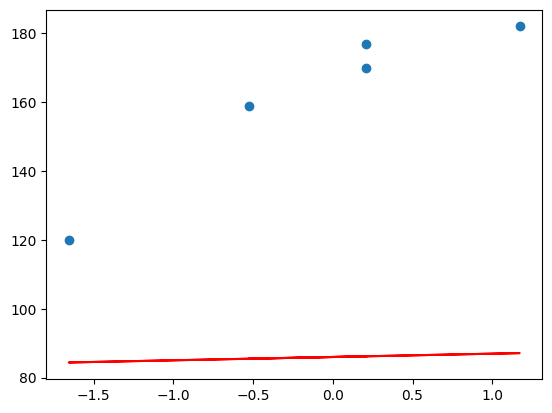

In [47]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regressor.predict(x_test), 'r')

# performance metrics
## MSE , MAE, EMSE
## R square and adjusted R square

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [50]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6192.3331592623745
75.74603640116501
78.69137919278309


# R square
fromula
R^2 = 1-SSr/SST

R^2 = coefficienation SSR = sum of squares of residuals SST = total sum of squarees

In [51]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [52]:
score

-11.579906466890895

# Ajusted R square

** Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)] **

where:


R2: The R2 of the model
n: The number of observations
k: The number of prediction variables

In [54]:
## display adjusted R-squared
1 -(1-score) *(len(y_test)-1) / (len(y_test) - x_test.shape[1]-1)

-15.773208622521192

In [55]:
regressor

LinearRegression()

In [58]:
## new datapoint weight is 80
sacled_weight = scaler.transform([[80]])
sacled_weight


c:\Users\Haha CORPORATION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [62]:
sacled_weight[0]

array([0.32350772])

In [64]:
print("the height prediction for weight 80 kg is :" ,regressor.predict([sacled_weight[0]]))

the height prediction for weight 80 kg is : [86.27864331]


c:\Users\Haha CORPORATION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


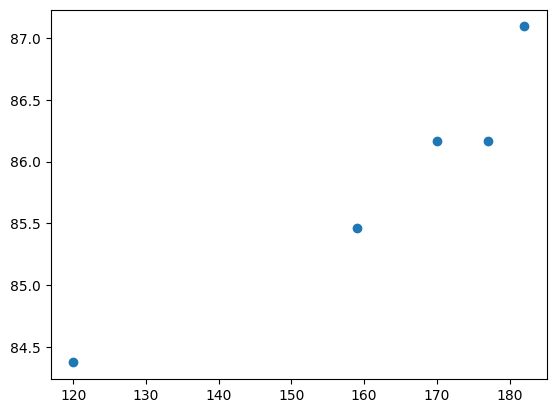

In [65]:
### ASSumption
### plot a catter plot for the prediction
plt.scatter(y_test, y_pred_test)

In [66]:
## Residuals
residuals = y_test - y_pred_test
residuals

15    90.830249
9     83.830249
0     35.626971
8     94.904665
17    73.538048
Name: Height, dtype: float64

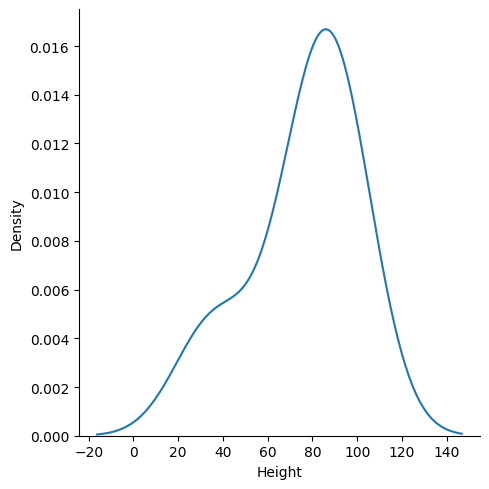

In [ ]:
##plot this residuals
import seaborn as sns
sns.displot(residuals, kind='kde')

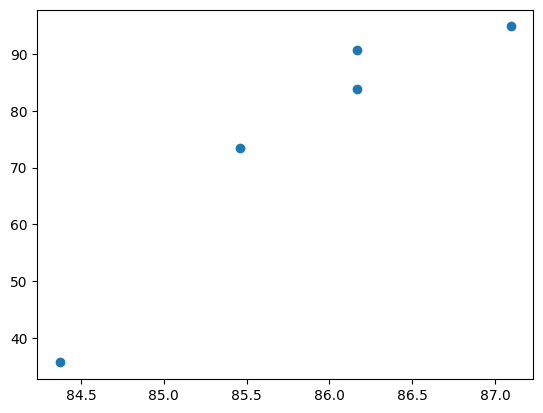

In [68]:
plt.scatter(y_pred_test, residuals)

In [ ]:
##pi